In [3]:
#we do basic exploratory data analysis on the data collected by a store during Black Friday sale.
#library Imports

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
    

In [11]:
#import Data
df=pd.read_csv(r'C:\Users\navgu\Desktop\BlackFriday.csv')

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
#To check if there are any null values to be taken care of
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [14]:
#taking care of null values and settiing thenm to 0 as data is Int type.
df.fillna(0,inplace=True)


In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [18]:
print('Product_Category_2',df['Product_Category_2'].unique())

Product_Category_2 [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [19]:
print('Product_Category_3',df['Product_Category_3'].unique())
print('Product_Category_1',df['Product_Category_1'].unique())

Product_Category_3 [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [20]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [21]:
#We see that there are 2 category of data which are float which can be int so we convert them to int.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [22]:
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

In [23]:
df.drop(columns=['User_ID','Product_ID'])

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969
5,M,26-35,15,A,3,0,1,2,0,15227
6,M,46-50,7,B,2,1,1,8,17,19215
7,M,46-50,7,B,2,1,1,15,0,15854
8,M,46-50,7,B,2,1,1,16,0,15686
9,M,26-35,20,A,1,1,8,0,0,7871


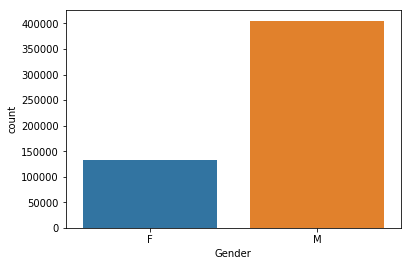

In [24]:
#plot shows urchasing power of men was very high than women but this can be because many men paid for their spouses.
#we will explore it further.
sns.countplot(df['Gender'])

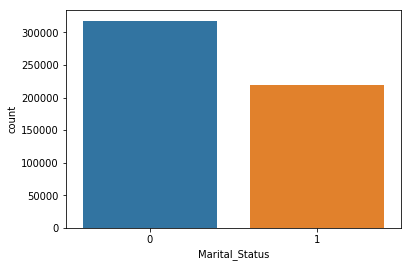

In [27]:
#0 shows non married people and 1 married.
sns.countplot(df['Marital_Status'])

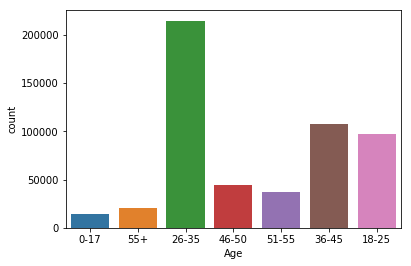

In [29]:
#Age distrubution of people who bought things at Black friday at a sale.
sns.countplot(df['Age'])

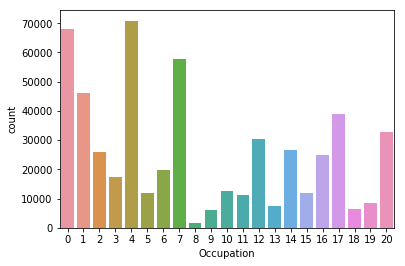

In [35]:

sns.countplot(df['Occupation'])

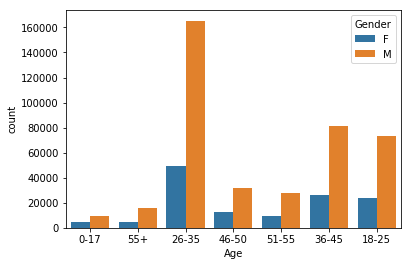

In [37]:
#Plot shows diffrent gender in diffrent age category who bought things at black friday sale.
sns.countplot(df['Age'],hue=df['Gender'])


In [38]:
#making a column to tell wheather that person is married or not with gender.
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

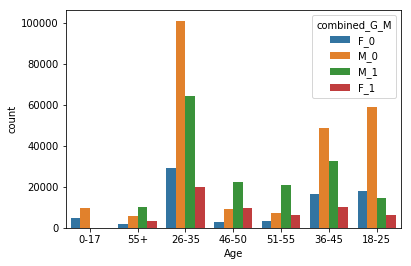

In [39]:
sns.countplot(df['Age'],hue=df['combined_G_M'])


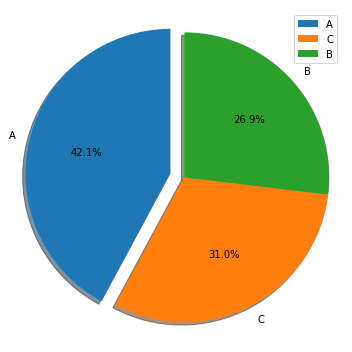

In [44]:
#plot shows people from diffrent cities who came to that store during black friday sale.
explode=(0.1,0,0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df['City_Category'].value_counts(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

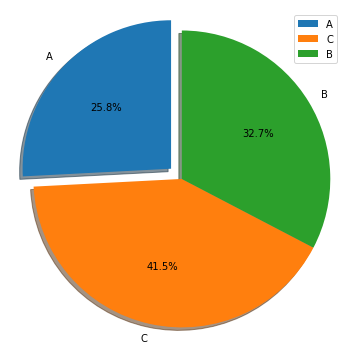

In [46]:
#plot showing purcahses made by each city category at that store.

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(df.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

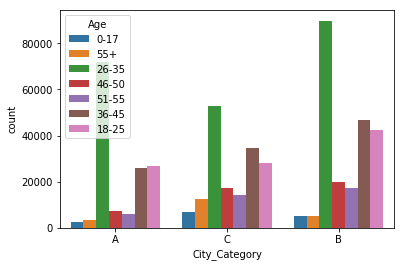

In [47]:
#Plot showing plot of no of people in each 
sns.countplot(df['City_Category'],hue=df['Age'])
# people from Area B have a greater purchasing power than others, and greater sales gained from people from Area C

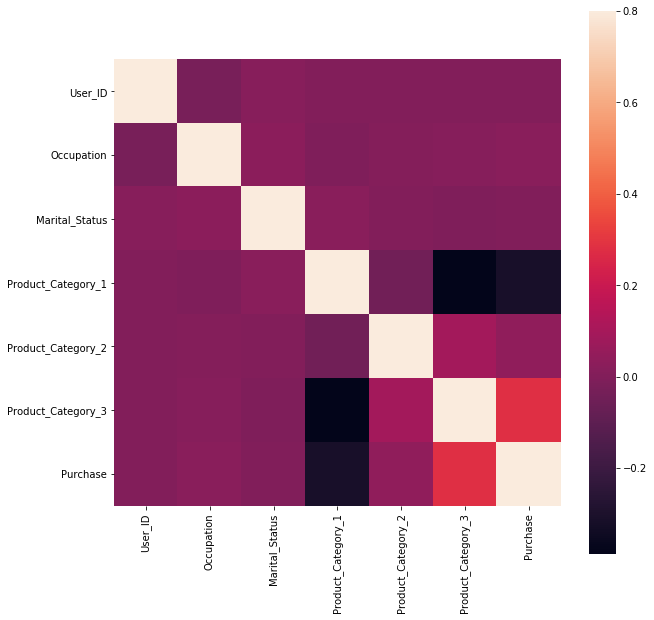

In [50]:
#this is a correlation graph .we se that product 3 was purchased most. maybe because it was cheap or a genral utility item.
corrmat = df.corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, vmax=.8, square=True)